In [96]:
import numpy as np
import scipy as sp
from scipy.io.wavfile import read
from scipy.io.wavfile import write     # Imported libaries such as numpy, scipy(read, write), matplotlib.pyplot
from scipy import signal
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')




In [97]:
(Frequency, array) = read('try01.wav')
len(array) 

220160

Text(0, 0.5, 'Amplitude')

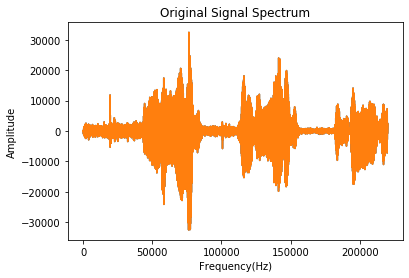

In [98]:
plt.plot(array) 
plt.title('Original Signal Spectrum')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude')


In [99]:
FourierTransformation = sp.fft(array) # Calculating the fourier transformation of the signal

In [100]:
scale = sp.linspace(0, Frequency, len(array))

ValueError: setting an array element with a sequence.

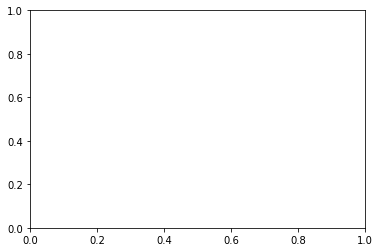

In [101]:
plt.stem(scale[0:5000],  np.abs(FourierTransformation[0:5000]), 'r', use_line_collection=True)  # The size of our diagram


In [ ]:
plt.title('Signal spectrum after FFT')


Text(0.5, 0, 'Frequency(Hz)')

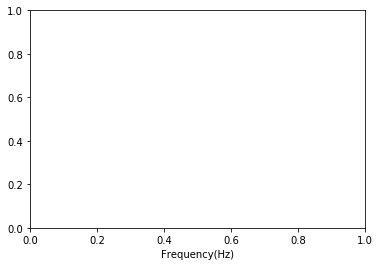

In [102]:
plt.xlabel('Frequency(Hz)')


Text(0, 0.5, 'Amplitude')

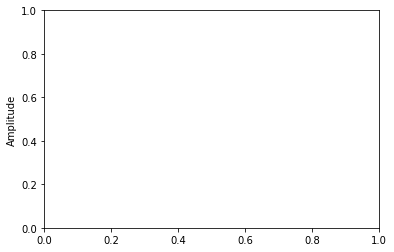

In [103]:
plt.ylabel('Amplitude')

In [104]:
GuassianNoise = np.random.rand(len(FourierTransformation.reshape(1,-1)))
# GuassianNoise = np.reshape(1,-1)# Adding guassian Noise to the signal.

In [105]:
NewSound = GuassianNoise + array

In [106]:
write("v1.wav", Frequency, NewSound) # Saving it to the file.

In [107]:
b,a = signal.butter(5, 1000/(Frequency/2), btype='highpass') # ButterWorth filter 4350

Text(0, 0.5, 'Amplitude')

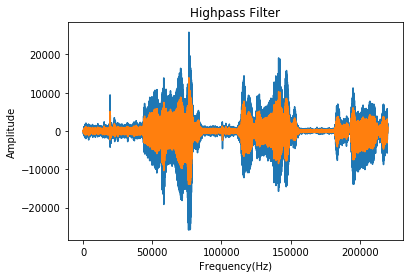

In [108]:
filteredSignal = signal.lfilter(b,a,NewSound)
plt.plot(filteredSignal) # plotting the signal.
plt.title('Highpass Filter')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

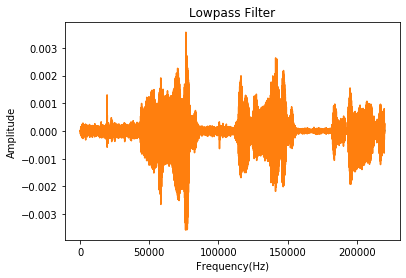

In [109]:
c,d = signal.butter(5, 380/(Frequency/2), btype='lowpass') # ButterWorth low-filter
newFilteredSignal = signal.lfilter(c,d,filteredSignal) # Applying the filter to the signal
plt.plot(newFilteredSignal) # plotting the signal.
plt.title('Lowpass Filter')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude')

In [110]:
write("v2.wav", Frequency, newFilteredSignal) # Saving it to the file.